# EDA

* Vamos a importar las librerias que vamos a necesitar

In [42]:
import pandas as pd
import json
import ast 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import numpy as np

* Vamos a importar los archivos

In [20]:
games = pd.read_parquet('src/games.parquet')
items = pd.read_parquet('src/items.parquet')
reviews = pd.read_parquet('src/reviews.parquet')

* Creamos los dataframes para poder hacer el EDA

In [21]:
games = pd.DataFrame(games)
items = pd.DataFrame(items)
reviews = pd.DataFrame(reviews)

# Games:

In [22]:
games.head(3)

,title,price,early_access,id,developer,release,genre
88310,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018,Action
88310,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018,Casual
88310,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018,Indie


In [23]:
# Contar la cantidad de videojuegos por género y ordenarlos de manera descendente
genre_counts = games['genre'].value_counts().sort_values(ascending=False)


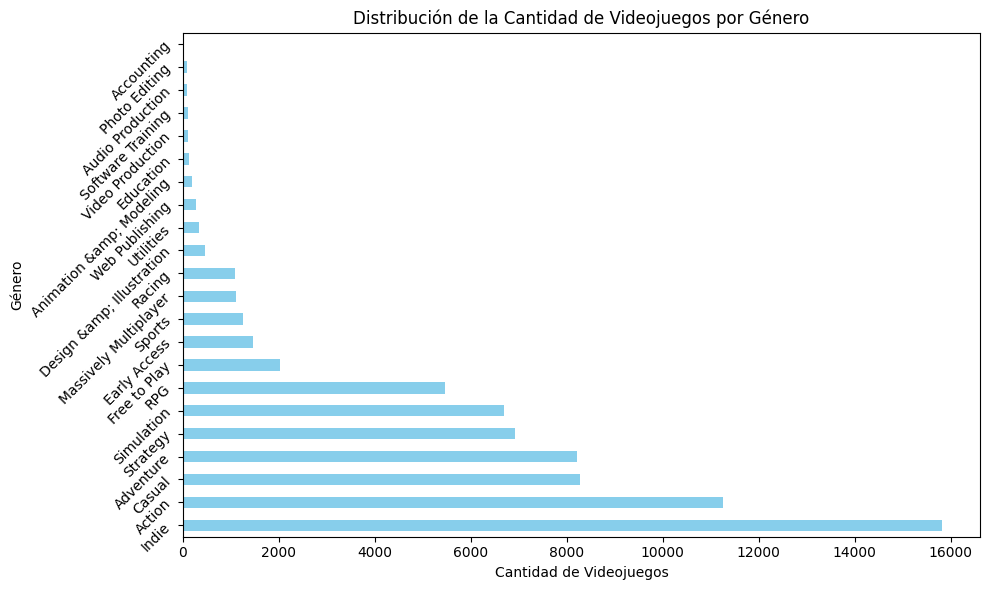

In [24]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='skyblue')  # Cambiar a 'barh' para barras horizontales

# Añadir etiquetas y título
plt.ylabel('Género')
plt.xlabel('Cantidad de Videojuegos')
plt.title('Distribución de la Cantidad de Videojuegos por Género')

# Rotar las etiquetas del eje y (géneros) 45°
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* Por amplia diferencia, el género indie es el que más entradas tiene, debido a que es un género muy amplio ya que corresponde al tamaño y presupuesto del desarrollador y no depende de la jugabilidad o trama del videojuego


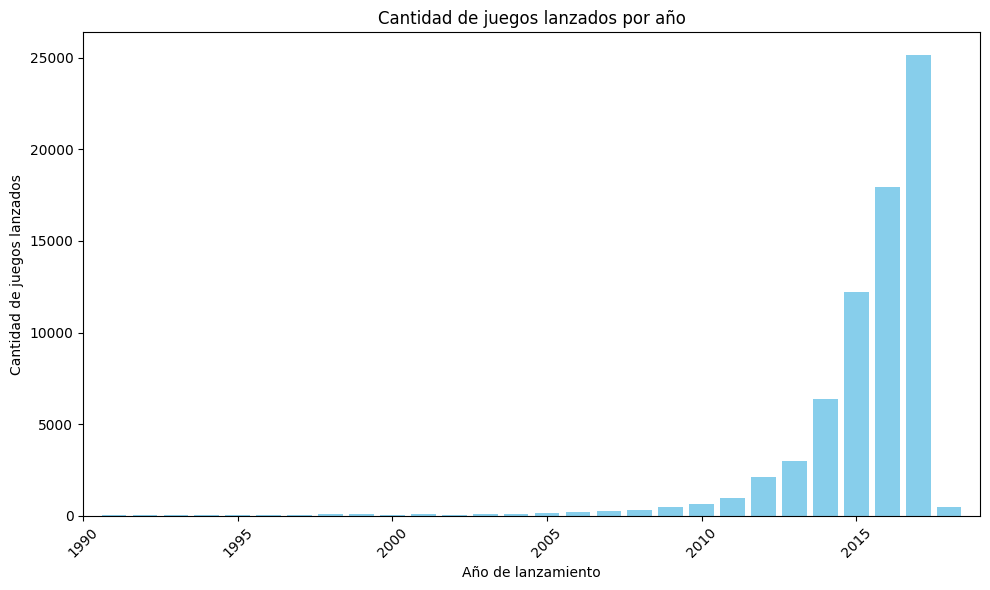

In [29]:
# Agrupa los datos por el año de lanzamiento y cuenta el número de juegos en cada año
games_by_year = games.groupby('release')['title'].count()

# Crea el gráfico
plt.figure(figsize=(10, 6))
plt.bar(games_by_year.index, games_by_year.values, color='skyblue')

# Añade etiquetas y título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos lanzados')
plt.title('Cantidad de juegos lanzados por año')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Establece el rango del eje x
plt.xlim(1990, 2019)

# Muestra el gráfico
plt.tight_layout()
plt.show()



* Como se puede observar, tenemos entradas desde el año 1991 hasta el año 2018, siendo 2017 el año con más videojuegos lanzados en steam

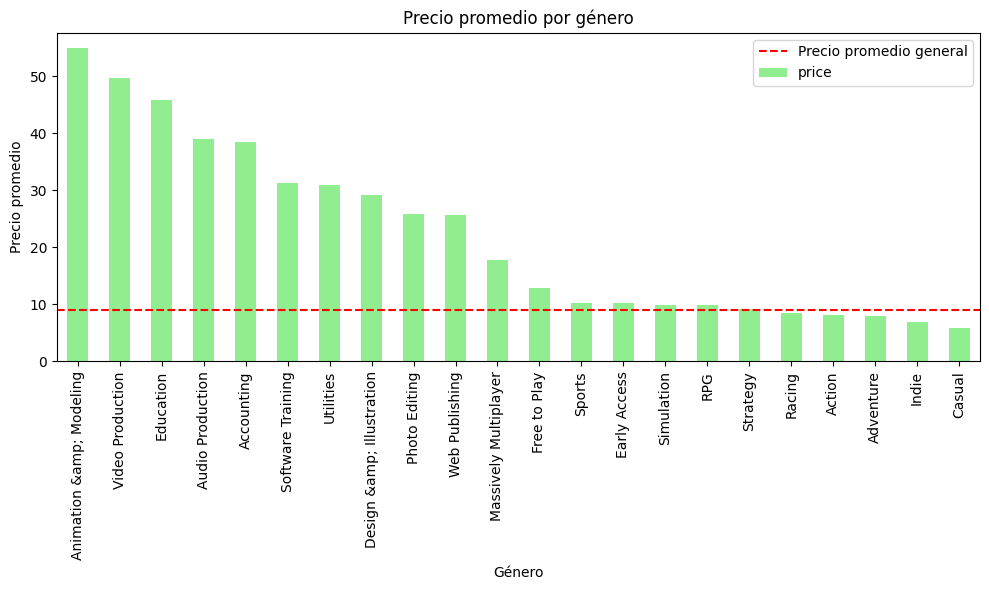

In [35]:
# Calcula el promedio general de precios para todos los juegos
average_price_all_games = games['price'].mean()

# Agrupa los datos por género y calcula el promedio de precios para cada grupo
average_price_by_genre = games.groupby('genre')['price'].mean()

# Ordena los resultados por el promedio de precios en orden descendente
average_price_by_genre_sorted = average_price_by_genre.sort_values(ascending=False)

# Crea el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras
average_price_by_genre_sorted.plot(kind='bar', color='lightgreen')

# Línea para el promedio general de precios
plt.axhline(y=average_price_all_games, color='red', linestyle='--', label='Precio promedio general')

# Añade etiquetas y título
plt.xlabel('Género')
plt.ylabel('Precio promedio')
plt.title('Precio promedio por género')

# Añade leyenda
plt.legend()

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

* En este gráfico podemos ver que los produtos de uso profecional como pueden ser las categorias 'animation&amp: Modeling' o 'Education' su promedio de precios está muy por encima del promedio general de precios

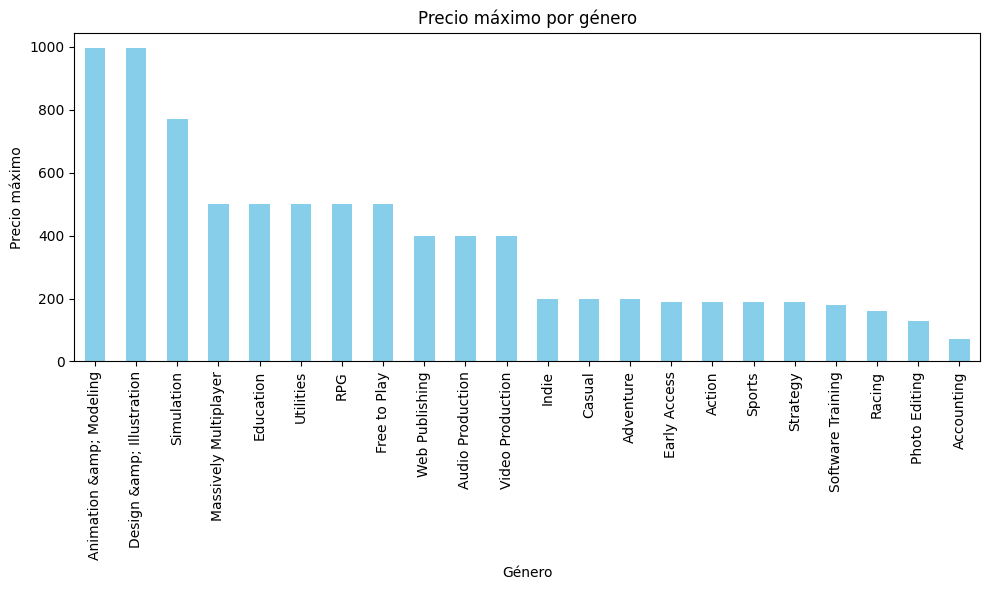

In [36]:
# Agrupa los datos por género y calcula el precio máximo para cada grupo
max_price_by_genre = games.groupby('genre')['price'].max()

# Ordena los resultados por el precio máximo en orden descendente
max_price_by_genre_sorted = max_price_by_genre.sort_values(ascending=False)

# Crea el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras
max_price_by_genre_sorted.plot(kind='bar', color='skyblue')

# Añade etiquetas y título
plt.xlabel('Género')
plt.ylabel('Precio máximo')
plt.title('Precio máximo por género')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

* Sin embargo si observamos los precios máximos de cada género la distribucion de los géneros está más distribuida

# Items:

In [9]:
items.head(3)

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,genres,price,developer,release
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,[Action],9.99,Valve,2000
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,[Action],4.99,Valve,1999
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,[Action],4.99,Valve,2003


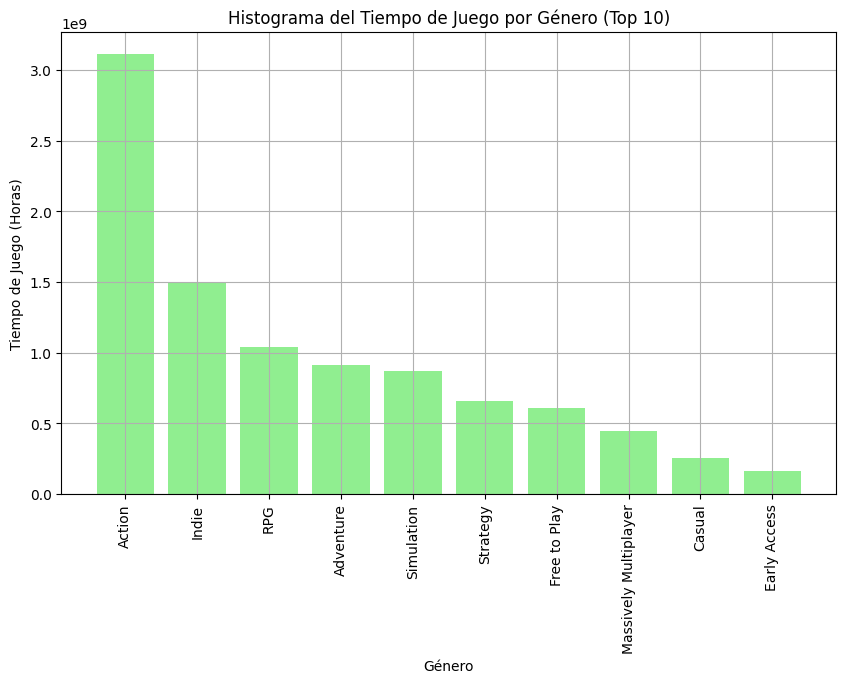

In [48]:
# Explotar la columna 'genres' para crear filas separadas para cada género
items_exploded = items.explode('genres')

# Calcular el tiempo total de juego por género
total_playtime_per_genre = items_exploded.groupby('genres')['playtime_forever'].sum()

# Ordenar los géneros según su tiempo total de juego en orden descendente
total_playtime_per_genre_sorted = total_playtime_per_genre.sort_values(ascending=False)

# Seleccionar los géneros principales (por ejemplo, los 10 primeros)
top_10_genres = total_playtime_per_genre_sorted.head(10)

# Obtener los nombres de los géneros y sus respectivos tiempos de juego
genre_names = top_10_genres.index
playtimes = top_10_genres.values

# Crear el histograma con los nombres de los géneros en el eje x y los tiempos de juego en el eje y
plt.figure(figsize=(10, 6))
plt.bar(genre_names, playtimes, color='lightgreen')
plt.title('Histograma del Tiempo de Juego por Género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Tiempo de Juego (Horas)')
plt.xticks(rotation=90)  # Rotar los nombres de los géneros en el eje x para mayor legibilidad
plt.grid(True)
plt.show()



* El género más jugado es Action con más de 3 mil millones de horas 

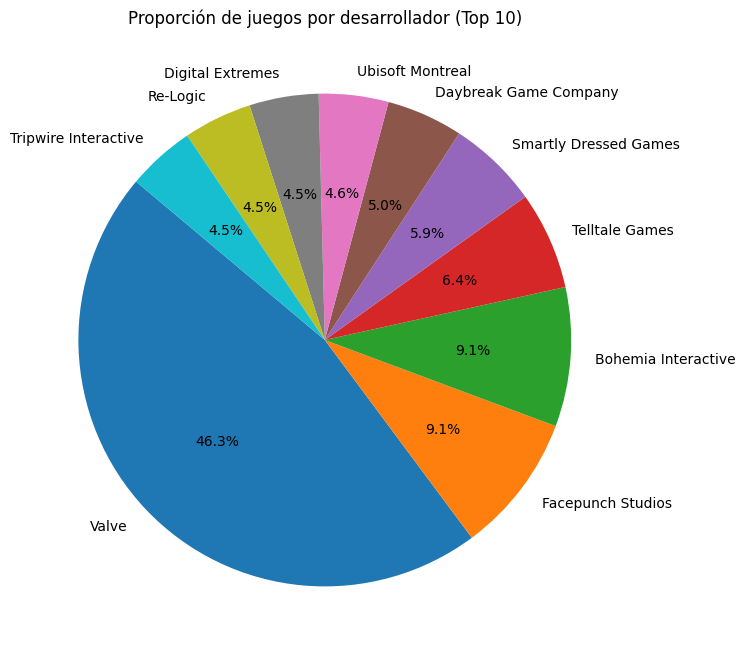

In [53]:
# Calcular la cantidad de juegos por desarrollador
games_per_developer = items['developer'].value_counts()

# Limitar a los 10 principales desarrolladores para una mejor visualización
top_10_developers = games_per_developer.head(10)

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
top_10_developers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporción de juegos por desarrollador (Top 10)')
plt.ylabel('')
plt.show()

* Top 10 de los desarrolladores principales de la plataforma


# Reviews: 

In [10]:
reviews.head(3)

,user_id,item_id,recommend,review,posted_year,title,developer,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,Killing Floor,Tripwire Interactive,2
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,Zeno Clash,ACE Team,2
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011,Otros,Otros,2


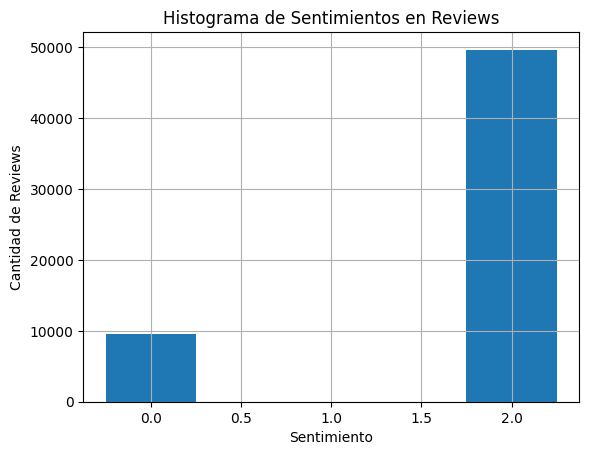

In [57]:

# Crear un histograma de sentimientos
plt.hist(reviews['sentiment_analysis'], bins=[-0.5, 0.5, 1.5, 2.5], align='mid', rwidth=0.5)

# Etiquetas y título
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reviews')
plt.title('Histograma de Sentimientos en Reviews')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [56]:
# Contar la cantidad de reviews neutras
neutral_reviews_count = (reviews['sentiment_analysis'] == 1).sum()
print("Cantidad de reviews neutras:", neutral_reviews_count)


Cantidad de reviews neutras: 30


* En este gráfico podemos ver la gran diferencia que hay entre las reviews positivas y negativas con respecto a las reviews neutras

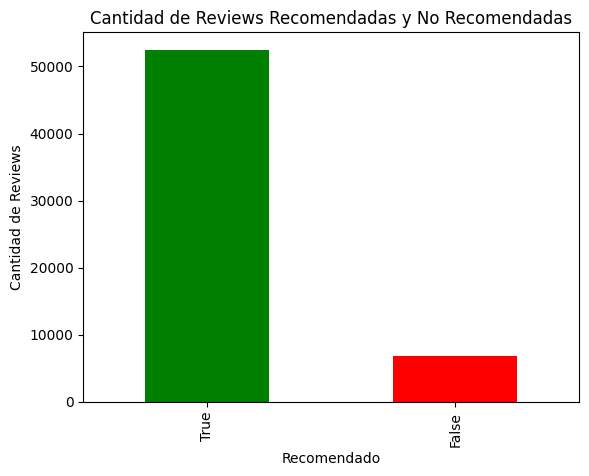

In [58]:
# Contar la cantidad de reviews recomendadas y no recomendadas
recommendation_counts = reviews['recommend'].value_counts()

# Crear un gráfico de barras
recommendation_counts.plot(kind='bar', color=['green', 'red'])

# Etiquetas y título
plt.xlabel('Recomendado')
plt.ylabel('Cantidad de Reviews')
plt.title('Cantidad de Reviews Recomendadas y No Recomendadas')

# Mostrar el gráfico
plt.show()

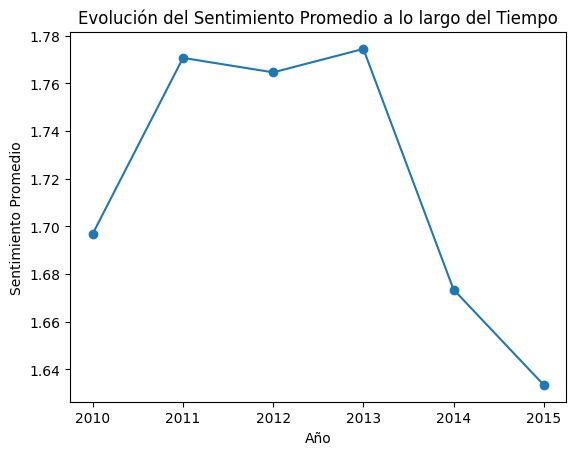

In [59]:
# Crear un gráfico de línea para mostrar la evolución de los sentimientos a lo largo del tiempo
sentiment_over_time = reviews.groupby('posted_year')['sentiment_analysis'].mean()
sentiment_over_time.plot(kind='line', marker='o')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Sentimiento Promedio')
plt.title('Evolución del Sentimiento Promedio a lo largo del Tiempo')

# Mostrar el gráfico
plt.show()

* Este gráfico muestra que los usuarios se han vuelto más criticos a través del tiempo, o la calidad de los videojuegos ha disminuido 

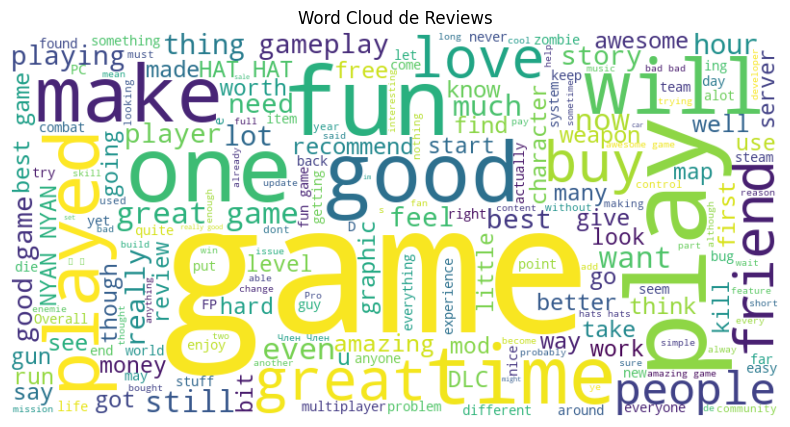

In [60]:
from wordcloud import WordCloud

# Crear una Word Cloud con las palabras más comunes en las reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reviews['review']))

# Mostrar la Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews')
plt.show()

* Un word cloud de las palabras más repetidas de las reviews